#Saswata Basu
##20MID0035

##Assignment 3

Build a CNN model for Bird species <br>
Bird species classification is the process of using machine learning and computer vision techniques to identify and categorize different species of birds based on their visual characteristics. By analyzing images of birds, models can extract features and patterns to accurately classify bird species. This classification is vital for ecological research, wildlife monitoring, and conservation efforts. Advancements in deep learning and the availability of large annotated datasets have improved the accuracy of bird species classification models. Challenges include variations in lighting, pose, and background clutter. Ongoing research focuses on methods like transfer learning and data augmentation to enhance classification performance and contribute to avian biodiversity understanding and conservation. <br>
Dataset Link: https://www.kaggle.com/datasets/akash2907/bird-species-classification

In [1]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import opendatasets as od
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Set the Kaggle dataset URL
dataset_url = 'https://www.kaggle.com/akash2907/bird-species-classification'

# Download the dataset
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saswatabasu
Your Kaggle Key: ··········


100%|██████████| 1.37G/1.37G [00:10<00:00, 141MB/s]


In [5]:
# Set the directory paths for train and test data
train_dir = '/content/bird-species-classification/train_data'
test_dir = '/content/bird-species-classification/test_data'

In [6]:
# Function to create DataFrame for a given directory
def create_dataframe(directory):
    # Initialize an empty list to store the file paths
    file_paths = []

    # Initialize an empty list to store the bird species labels
    bird_species = []

    # Iterate over the subdirectories and files in the directory
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            file_paths.append(file_path)

            # Extract the bird species label from the subdirectory name
            bird_species_label = os.path.basename(subdir)
            bird_species.append(bird_species_label)

    # Create a DataFrame with the file paths and bird species labels
    df = pd.DataFrame({'filepaths': file_paths, 'bird_species': bird_species})

    return df

In [7]:
# Initialize an empty list to store train and test DataFrames
train_dfs = []
test_dfs = []

In [8]:
# Create train and test DataFrames
train_df = create_dataframe(train_dir)
test_df = create_dataframe(test_dir)

In [9]:
# Print the train and test DataFrames
print("Train DataFrame:")
print(train_df.head())
print("\nTest DataFrame:")
print(test_df.head())

Train DataFrame:
                                           filepaths bird_species
0  /content/bird-species-classification/train_dat...       hsparo
1  /content/bird-species-classification/train_dat...       hsparo
2  /content/bird-species-classification/train_dat...       hsparo
3  /content/bird-species-classification/train_dat...       hsparo
4  /content/bird-species-classification/train_dat...       hsparo

Test DataFrame:
                                           filepaths bird_species
0  /content/bird-species-classification/test_data...       hsparo
1  /content/bird-species-classification/test_data...       hsparo
2  /content/bird-species-classification/test_data...       hsparo
3  /content/bird-species-classification/test_data...       hsparo
4  /content/bird-species-classification/test_data...       hsparo


In [10]:
# Define the image size and batch size
image_size = (224, 224)
batch_size = 32

In [11]:
# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Normalization for the test set (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# Create train and test data generators
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='bird_species',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='bird_species',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 150 validated image filenames belonging to 16 classes.
Found 157 validated image filenames belonging to 16 classes.


In [13]:
# Get the number of classes
num_classes = train_df['bird_species'].nunique()

# Build the improved CNN model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Set the number of epochs and steps per epoch
epochs = 20
steps_per_epoch = train_generator.n // train_generator.batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_generator
)


Epoch 1/20
4/4 [==============================] - 105s 27s/step - loss: 3.3200 - accuracy: 0.0763 - val_loss: 2.7391 - val_accuracy: 0.1210
Epoch 2/20
4/4 [==============================] - 85s 25s/step - loss: 2.6869 - accuracy: 0.1864 - val_loss: 2.6983 - val_accuracy: 0.1274
Epoch 3/20
4/4 [==============================] - 116s 35s/step - loss: 2.6141 - accuracy: 0.1250 - val_loss: 2.7342 - val_accuracy: 0.1274
Epoch 4/20
4/4 [==============================] - 86s 26s/step - loss: 2.6451 - accuracy: 0.1610 - val_loss: 2.7234 - val_accuracy: 0.1210
Epoch 5/20
4/4 [==============================] - 111s 35s/step - loss: 2.6334 - accuracy: 0.1780 - val_loss: 2.7080 - val_accuracy: 0.1083
Epoch 6/20
4/4 [==============================] - 83s 25s/step - loss: 2.5157 - accuracy: 0.1441 - val_loss: 2.6882 - val_accuracy: 0.2229
Epoch 7/20
4/4 [==============================] - 87s 26s/step - loss: 2.4253 - accuracy: 0.2188 - val_loss: 2.6982 - val_accuracy: 0.2038
Epoch 8/20
4/4 [========

In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

5/5 [==============================] - 50s 10s/step - loss: 2.5152 - accuracy: 0.2611
Test Loss: 2.5152
Test Accuracy: 0.2611


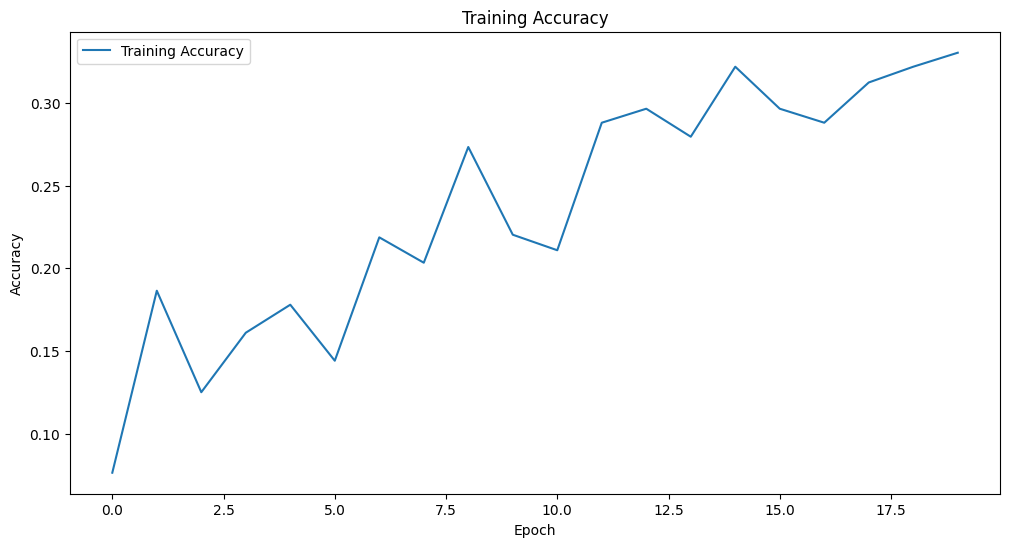

In [16]:
# Plot training and validation accuracy curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

In [17]:
# Evaluate the model on the test set
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes


5/5 [==============================] - 49s 10s/step


In [18]:
# Print classification report
print('Classification Report:')
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.47      0.48        15
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         7
           6       0.17      0.30      0.21        10
           7       0.16      0.26      0.20        19
           8       0.35      0.75      0.48        20
           9       0.00      0.00      0.00         9
          10       0.38      0.33      0.35         9
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         7
          14       0.29      0.45      0.36        11
          15       0.13      0.30      0.18        10

    accuracy                           0.26       157
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


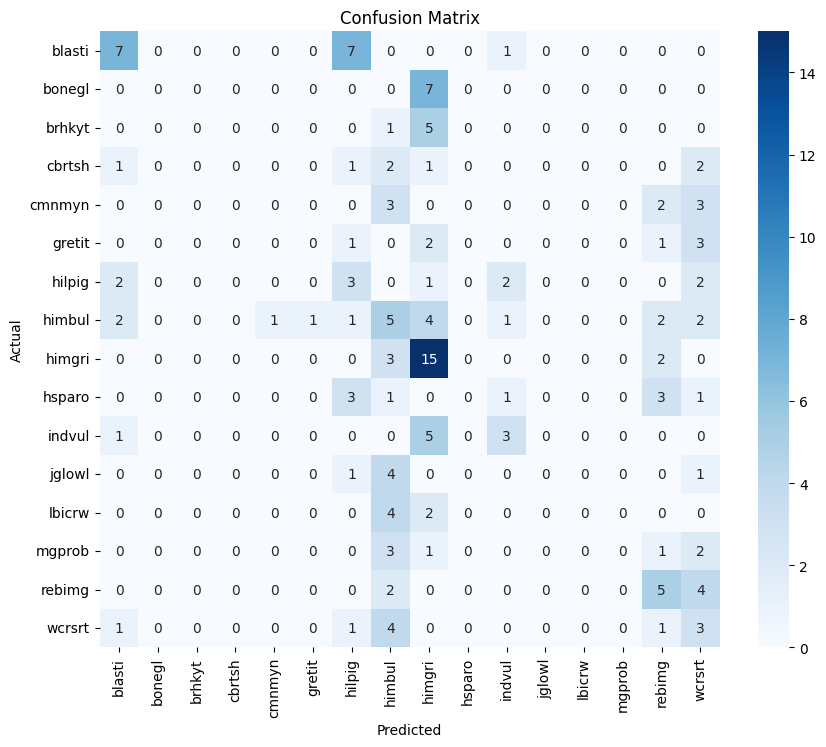

In [19]:
# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()